In [1]:
#Import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load files
filePath = 'data/insurance.xlsx'
data = pd.read_excel(filePath)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [4]:
# View the shape of the column
data.shape

(1338, 7)

In [5]:
# Check for the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [6]:
# Check for correlation on the data on a table
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

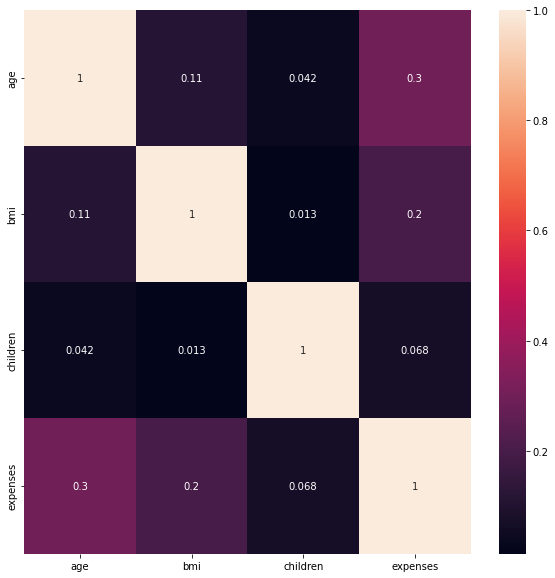

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()

sns.heatmap(corr, annot=True, ax=ax)

In [14]:
# Get all the columns that have string
data.select_dtypes('object').value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
dtype: int64

In [16]:
# Other way of checking for the object string type
data_type = dict(data.dtypes)

for name, types in data_type.items():
    if str(types) == 'object':
        print(f"======={name}========")
        print(data[name].value_counts())
        print()


=======sex========
male      676
female    662
Name: sex, dtype: int64

=======smoker========
no     1064
yes     274
Name: smoker, dtype: int64

=======region========
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [17]:
# Perform label encoding for the object data type using label encoding
from sklearn.preprocessing import LabelEncoder

for name, types in data_type.items():
    if str(types) == 'object':
        labelEco = LabelEncoder()
        data[name] = labelEco.fit_transform(data[name])


In [18]:
# Check for the info again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 57.6 KB


In [19]:
# Extract the x and y data
y_col = 'expenses'

x = data.drop(y_col, axis=1)
y = data[y_col]

In [20]:
x.shape, y.shape

((1338, 6), (1338,))

In [21]:
x.head()

,age,sex,bmi,children,smoker,region
0,19.0,0,27.9,0.0,1,3
1,18.0,1,33.8,1.0,0,2
2,28.0,1,33.0,3.0,0,2
3,33.0,1,22.7,0.0,0,1
4,32.0,1,28.9,0.0,0,1


In [22]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [23]:
# Perform the train test split
from sklearn.model_selection import train_test_split

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [25]:
Xtrain

,age,sex,bmi,children,smoker,region
127,52.0,0,37.4,0.0,0,3
578,52.0,1,30.2,1.0,0,3
385,19.0,1,34.4,0.0,0,3
1203,51.0,1,32.3,1.0,0,0
413,25.0,1,23.9,5.0,0,3
...,...,...,...,...,...,...
360,48.0,0,32.3,2.0,0,0
709,36.0,0,27.7,0.0,0,0
439,26.0,1,29.5,0.0,0,0
174,24.0,0,33.3,0.0,0,1


In [28]:
Xtest

,age,sex,bmi,children,smoker,region
726,41.0,1,28.4,1.0,0,1
260,58.0,0,25.2,0.0,0,3
902,26.0,1,27.3,3.0,0,0
566,38.0,0,40.6,1.0,0,1
776,40.0,1,32.3,2.0,0,1
...,...,...,...,...,...,...
705,33.0,0,32.9,2.0,0,3
309,41.0,0,33.1,2.0,0,1
1183,48.0,0,27.4,1.0,0,0
1281,47.0,0,27.6,2.0,1,1


In [29]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
Xtrain = scalar.fit_transform(Xtrain)
Xtest = scalar.fit_transform(Xtest)

In [30]:
Xtest.shape, Xtrain.shape

((268, 6), (1070, 6))

In [32]:
Xtrain.mean()

1.7154847981746968e-17

In [33]:
Xtest.mean()

8.837596215921645e-17

In [34]:
# Linear prediction
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression()

In [35]:
# Get the coefficients
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [36]:
# Get the intercept
model.intercept_

13479.206925233644

In [42]:
model.predict(Xtest[0,:].reshape(1,-1))

array([8560.84905938])

In [43]:
model.coef_.dot(Xtest[0,:])+model.intercept_

8560.84905938471

In [44]:
model.predict(Xtest[5,:].reshape(1,-1))

array([2049.62910852])

THE END